# Myocardial Infarction (Heart Attack) Logistic Regression

### Import modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

H:\Data\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualisation Settings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("font", size=14)
sns.set(rc={'figure.figsize':(7,5.5)})
sns.set_style('whitegrid')
sns.set_palette('Set3')

### Logistic Regression Assumptions

In [3]:
#  Binary logistic regression requires the dependent variable to be binary.
#  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#  Only the meaningful variables should be included.
#  The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#  The independent variables are linearly related to the log odds.
#  Logistic regression requires quite large sample sizes.

### Data

In [4]:
data = pd.read_csv(r"C:\Users\admin-vicvphq\PycharmProjects\datasets\mifem.csv")

In [5]:
data.head(6)

,Unnamed: 0,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,live,63,85,n,x,n,y,y,n,n
1,6,live,55,85,n,c,n,y,y,n,n
2,8,live,68,85,y,nk,nk,y,nk,y,n
3,10,live,64,85,n,x,n,y,n,y,n
4,11,dead,67,85,n,nk,nk,nk,nk,nk,nk
5,15,live,66,85,n,x,nk,nk,nk,nk,nk


In [6]:
data.shape

(1295, 11)

In [7]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [8]:
data.head(6)

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63,85,n,x,n,y,y,n,n
1,live,55,85,n,c,n,y,y,n,n
2,live,68,85,y,nk,nk,y,nk,y,n
3,live,64,85,n,x,n,y,n,y,n
4,dead,67,85,n,nk,nk,nk,nk,nk,nk
5,live,66,85,n,x,nk,nk,nk,nk,nk


In [9]:
data.shape

(1295, 10)

In [10]:
for column in data.columns:
    unique_values = data[column].value_counts().count()
    print(str(column) +' has '+ str(unique_values) + ' unique values.')

outcome has 2 unique values.
age has 34 unique values.
yronset has 9 unique values.
premi has 3 unique values.
smstat has 4 unique values.
diabetes has 3 unique values.
highbp has 3 unique values.
hichol has 3 unique values.
angina has 3 unique values.
stroke has 3 unique values.


### Meeting condition 1: No Nulls

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
outcome     1295 non-null object
age         1295 non-null int64
yronset     1295 non-null int64
premi       1295 non-null object
smstat      1295 non-null object
diabetes    1295 non-null object
highbp      1295 non-null object
hichol      1295 non-null object
angina      1295 non-null object
stroke      1295 non-null object
dtypes: int64(2), object(8)
memory usage: 101.2+ KB


### Meeting condition 2: Sufficient Records

In [12]:
data.shape[0]/data.shape[1]

129.5

In [13]:
# condition is 50 records per variable, we have 129.5 per variable

### Meeting condition 3: Target is binary or ordinal

In [14]:
data['outcome'].value_counts()

live    974
dead    321
Name: outcome, dtype: int64

In [15]:
#there are only 2 values in the target varible, target is binary.

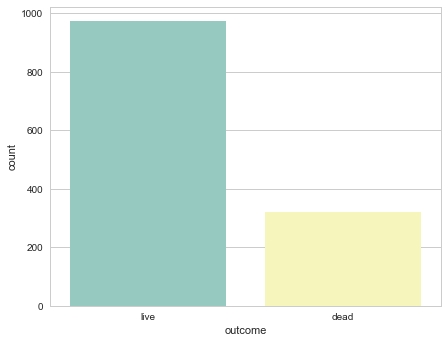

In [16]:
sns.countplot(data = data, x = 'outcome')

### Meeting condition 4: Little to no multicollinearity

### Data Exploration

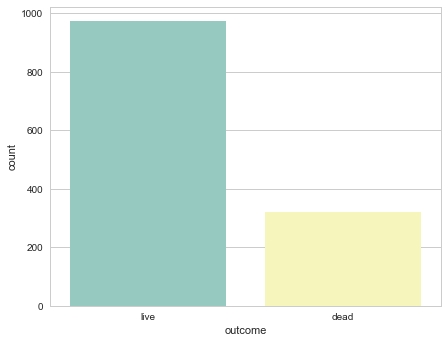

In [17]:
sns.countplot(data= data, x = 'outcome')

In [18]:
data.groupby('outcome').mean()

,age,yronset
outcome,,
dead,62.464174,88.398754
live,60.413758,88.912731


### Creating Dummy Variables

In [19]:
#converting categorical columns into binary columns

cat_vars = ['outcome', 'premi', 'smstat', 'diabetes', 'highbp', 'hichol', 'angina', 'stroke']

for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix = var, drop_first = True)
    data1 = data.join(cat_list)
    data = data1
    
cat_vars = ['outcome', 'premi', 'smstat', 'diabetes', 'highbp', 'hichol', 'angina', 'stroke']


data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [20]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'yronset', 'outcome_live', 'premi_nk', 'premi_y', 'smstat_n',
       'smstat_nk', 'smstat_x', 'diabetes_nk', 'diabetes_y', 'highbp_nk',
       'highbp_y', 'hichol_nk', 'hichol_y', 'angina_nk', 'angina_y',
       'stroke_nk', 'stroke_y'], dtype=object)

In [21]:
data_final.shape

(1295, 18)

### Export subset of data after creating dummy variables, to test model on later

In [22]:
data_final_last_295_records = data_final[1001:1295]

In [23]:
data_final_last_295_records.shape

(294, 18)

In [24]:
data_final.shape

(1295, 18)

In [25]:
data_final = data_final[0:1000]

In [26]:
data_final.shape

(1000, 18)

### Feature Selection (RFE) 

In [27]:
data_final_vars=data_final.columns.values.tolist()
y=['outcome_live']
X=[i for i in data_final_vars if i not in y]

In [28]:
#using recursive feature elimination to remove irrelevant columns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

features_to_keep = 8

rfe = RFE(logreg, features_to_keep) 
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False  True  True False False
  True  True  True  True  True]
[ 9  8  5  6  3  1  7  2  1  1 10  4  1  1  1  1  1]


H:\Data\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
rfe_support_list = rfe.support_.tolist()
print(rfe_support_list)

[False, False, False, False, False, True, False, False, True, True, False, False, True, True, True, True, True]


### Collecting relevant columns

In [30]:
data_final_columns = data_final[X].columns.tolist()

for n in range(len(rfe_support_list)):
    
    print(str(rfe_support_list[n]) +" : "+  data_final_columns[n])


False : age
False : yronset
False : premi_nk
False : premi_y
False : smstat_n
True : smstat_nk
False : smstat_x
False : diabetes_nk
True : diabetes_y
True : highbp_nk
False : highbp_y
False : hichol_nk
True : hichol_y
True : angina_nk
True : angina_y
True : stroke_nk
True : stroke_y


In [31]:
relevant_columns = []
for n in range(len(rfe_support_list)):
    if rfe_support_list[n] == True:
        relevant_columns.append(data_final_columns[n])
relevant_columns

['smstat_nk',
 'diabetes_y',
 'highbp_nk',
 'hichol_y',
 'angina_nk',
 'angina_y',
 'stroke_nk',
 'stroke_y']

In [32]:
X = data_final[relevant_columns]
y = data_final['outcome_live']

### Implementing the model

In [33]:
# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# import statsmodels.api as sm
# logit_model = sm.Logit(y,X)
# results = logit_model.fit()
# print(results.summary())

In [34]:
#check that p values are less than 0.05

### Logistic Regression Model Fitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
for n in logreg.coef_.tolist():
    print(n)

[-1.2463054388552741, -0.44976540302644186, -1.2482102816429046, 0.43904983744033155, -1.6980178432290822, -0.15516425787607502, -0.4479601895953918, -0.6591201329299127]


In [37]:
logreg.intercept_

array([ 1.44535046])

In [38]:
X.columns

Index(['smstat_nk', 'diabetes_y', 'highbp_nk', 'hichol_y', 'angina_nk',
       'angina_y', 'stroke_nk', 'stroke_y'],
      dtype='object')

In [39]:
len(X.columns)

8

### Predicting test set results and calculating the accuracy

In [40]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


### Cross Validation

In [41]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.793


In [42]:
#if the accuracy remains close to the accuracy of the logistic regression classifier on test set above the model 'generalizes well'

### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[ 13  57]
 [  8 222]]


In [44]:
# 6105 + 25 correct predictions
# 288 + 18 incorrect predictions 

### Compute precision, recall, F-measure and support

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.62      0.19      0.29        70
          1       0.80      0.97      0.87       230

avg / total       0.75      0.78      0.74       300



### ROC Curve

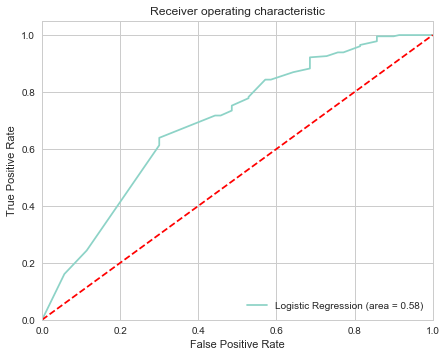

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


## Tests Below


In [47]:
data_final_last_295_records.to_csv("mifem_test_295_records.csv")